推理输出： tensor([[-0.1260, -1.0489,  0.3045,  0.9844, -0.0861,  0.8520,  0.4456, -0.4481,
         -0.4066, -0.7440]], grad_fn=<MmBackward0>)
Predicted label: 3
Ground truth: 3


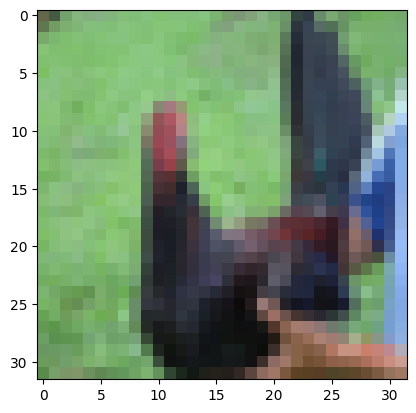

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.transform import resize

# 定义 LeNet-5 网络结构
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # C1: 输入1通道，输出6通道，卷积核大小为5x5
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=0, bias=False)
        # S2: 平均池化，核大小为2x2
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # C3: 输入6通道，输出16通道，卷积核大小为5x5
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=32, kernel_size=3, stride=1, padding=0, bias=False)
        # S4: 平均池化，核大小为2x2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # C5: 全连接卷积层，输入16通道，输出120通道，卷积核大小为5x5
        self.fc1 = nn.Linear(in_features=1152, out_features=256, bias=False)
        # 输出层: 输入84，输出10
        self.fc2 = nn.Linear(in_features=256, out_features=64, bias=False)
        # 输出层: 输入64，输出10
        self.fc3 = nn.Linear(in_features=64, out_features=10, bias=False)

    def forward(self, x):
        # C1 卷积层 + 激活函数
        x = self.conv1(x)   # 输入: 32x32x3, 输出: 28x28x12
        x = F.relu(x)
        # S2 池化层
        x = self.pool1(x)           # 输出: 14x14x6
        # C3 卷积层 + 激活函数
        x = F.relu(self.conv2(x))   # 输出: 10x10x16
        # S4 池化层
        x = self.pool2(x)           # 输出: 5x5x16
        # x = x.view(-1, 120)         # 将特征拉平为1D向量
        x = x.reshape(len(x), -1)
        # F6 全连接层 + 激活函数
        x = F.relu(self.fc1(x))     # 输出: 84
        # 输出层
        x = F.relu(self.fc2(x))             # 输出: 10
        x = self.fc3(x)
        return x

# 创建模型实例
model = LeNet5()
model.load_state_dict(torch.load('./model/model.pth', weights_only=True))

input_image = imageio.imread('./pictures/bird1.png')

# TODO (5 pts)
# normalize the pixel into [0,1]
image = (input_image - np.min(input_image)) / (np.max(input_image) - np.min(input_image))

# TODO (5 pts)
# alter the size of the pixel matrix from (32,32,3) to (1,3,32,32) to fit convolution layer
image = np.transpose(image, (2, 0, 1)).reshape(1, 3, 32, 32)
image = torch.from_numpy(image).to(torch.float32)
# 进行前向传播（推理）
output = model(image)

# 输出推理结果
print("推理输出：", output)
output = output.cpu().detach().numpy()
label = np.argmax(output)

import matplotlib.pyplot as plt
# visualize the picture to be classified
plt.imshow(input_image)
print("Predicted label:",label)
print("Ground truth: 3")